In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
train_path = "D:/temp_files/datasets/spaceship_titanic/train.csv"
test_path = "D:/temp_files/datasets/spaceship_titanic/test.csv"
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [2]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None


In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


* PassengerId 
    
        A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

        

* HomePlanet
  
        The planet the passenger departed from, typically their planet of permanent residence.

In [6]:
temp = train.copy(deep=True)

In [7]:
temp.loc[:, ['PassengerId', 'HomePlanet']].head(20)

,PassengerId,HomePlanet
0,0001_01,Europa
1,0002_01,Earth
2,0003_01,Europa
3,0003_02,Europa
4,0004_01,Earth
5,0005_01,Earth
6,0006_01,Earth
7,0006_02,Earth
8,0007_01,Earth
9,0008_01,Europa


In [22]:
temp.HomePlanet.value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

* CryoSleep

        Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

In [13]:
temp.loc[pd.isnull(temp['CryoSleep']), ["PassengerId","CryoSleep"]]

,PassengerId,CryoSleep
92,0099_02,NaN
98,0105_01,NaN
104,0110_02,NaN
111,0115_01,NaN
152,0173_01,NaN
...,...,...
8620,9197_01,NaN
8651,9227_05,NaN
8664,9246_01,NaN
8675,9259_01,NaN


<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

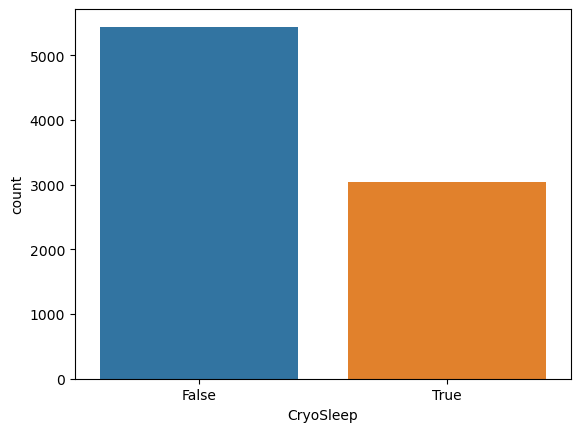

In [8]:
sns.countplot(data=temp, x='CryoSleep')

* Cabin

        The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

In [39]:
temp.Cabin.sample(10)

6706    G/1163/S
1739     G/302/P
7391    G/1276/P
5840     B/209/P
6075    F/1330/P
6654    G/1132/P
4962     C/206/S
1240      D/43/P
2596      D/83/P
8186     D/272/P
Name: Cabin, dtype: object


* Destination

        The planet the passenger will be debarking to.

In [40]:
temp.Destination.value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

* Age

        The age of the passenger.

<AxesSubplot:xlabel='Age', ylabel='Count'>

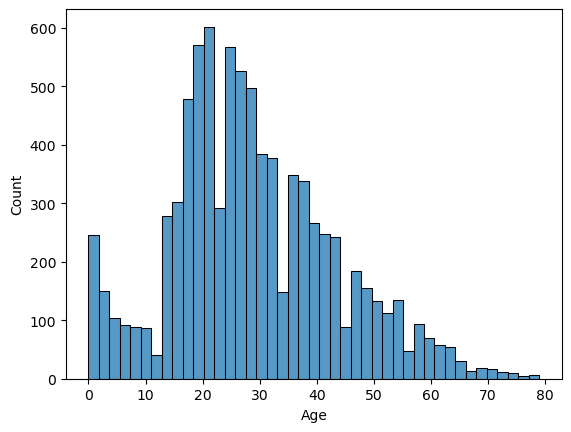

In [42]:
sns.histplot(data=temp, x=temp.Age)

* VIP

        Whether the passenger has paid for special VIP service during the voyage.

In [70]:
temp.groupby('Transported').apply(lambda x : x.VIP)

Transported      
False        0        True
             2       False
             3        True
             13       True
             15       True
                     ...  
True         8684     True
             8685     True
             8687     True
             8690     True
             8692     True
Name: VIP, Length: 8693, dtype: bool

<AxesSubplot:xlabel='VIP', ylabel='count'>

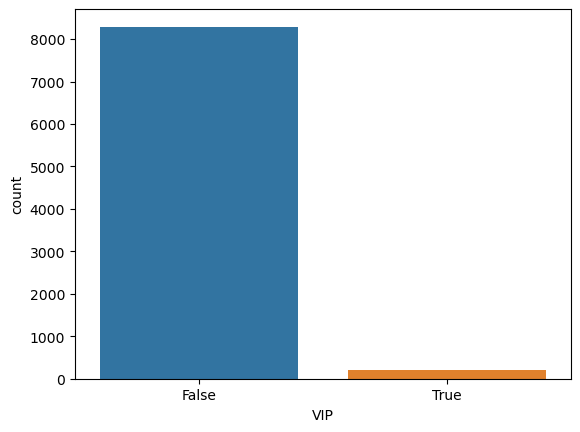

In [44]:
sns.countplot(data=temp, x='VIP')

* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck 
    
        Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

In [71]:
temp.VRDeck

0          0.0
1         44.0
2         49.0
3        193.0
4          2.0
         ...  
8688      74.0
8689       0.0
8690       0.0
8691    3235.0
8692      12.0
Name: VRDeck, Length: 8693, dtype: float64

* Name

        The first and last names of the passenger.

In [55]:
temp.Name.head()

0      Maham Ofracculy
1         Juanna Vines
2        Altark Susent
3         Solam Susent
4    Willy Santantines
Name: Name, dtype: object

* Transported
    
        Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

<AxesSubplot:xlabel='Transported', ylabel='count'>

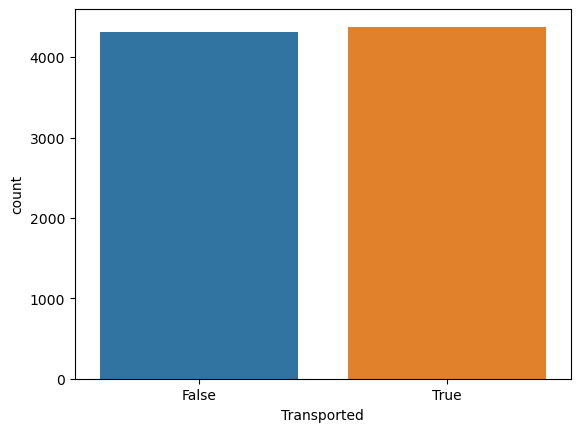

In [56]:
sns.countplot(data=temp, x='Transported')